In [26]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

/home/maddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


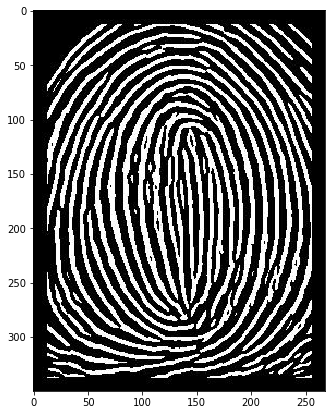

In [27]:
im = misc.imread("Downloads/images/2.jpg").astype(float)
f = plt.figure()
plt.imshow(im,cmap='gray')

In [28]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [29]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Text(0.5, 1.0, 'An 8x8 DCT block')

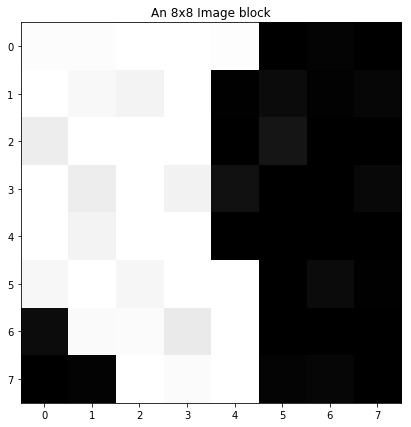

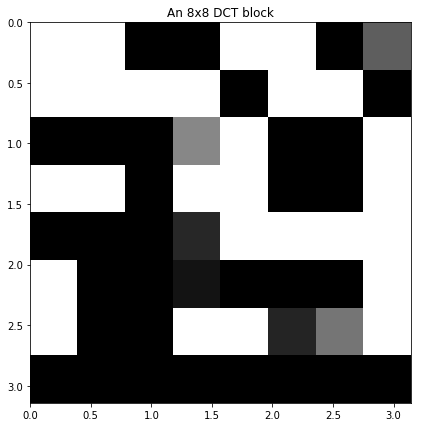

In [30]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Text(0.5, 1.0, '8x8 DCTs of the image')

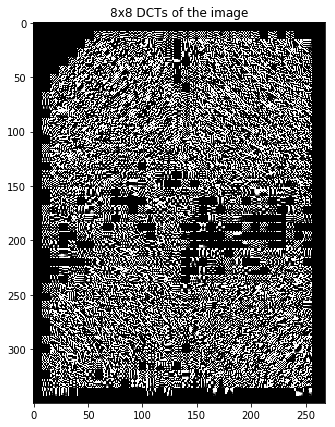

In [31]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Keeping only 54.508529% of the DCT coefficients


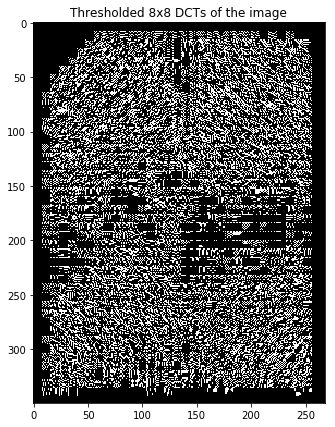

In [32]:
# Threshold
thresh = 0.012
dct_thresh_fp = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh_fp,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh_fp != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Text(0.5, 1.0, 'Comparison between original and DCT compressed images')

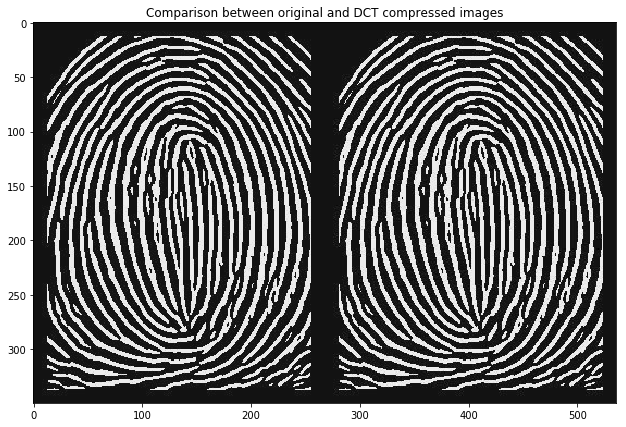

In [33]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh_fp[i:(i+8),j:(j+8)] )
        
        
plt.figure()
plt.imshow( np.hstack( (im, im_dct) ) ,cmap='gray')
plt.title("Comparison between original and DCT compressed images" )

In [35]:
dct_thresh_fp

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
feature_vector_fingerprint = dct_thresh_fp.ravel()

In [37]:
feature_vector_fingerprint

array([0., 0., 0., ..., 0., 0., 0.])

/home/maddy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


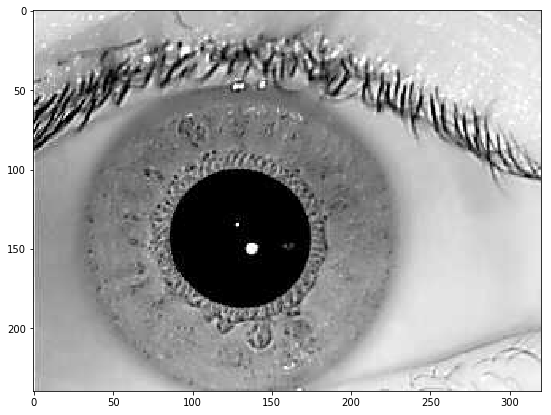

In [38]:
im = misc.imread("Downloads/images/Databa23.gif")
f = plt.figure()
plt.imshow(im,cmap='gray')

In [39]:
imsize = im.shape
dct = np.zeros(imsize)

# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'An 8x8 DCT block')

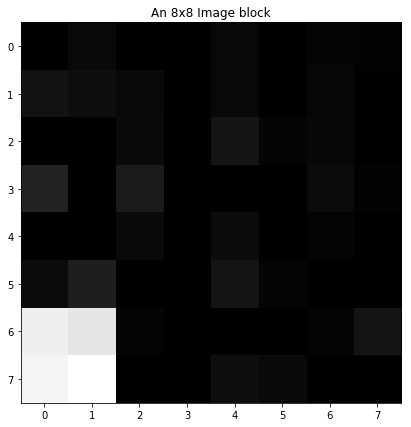

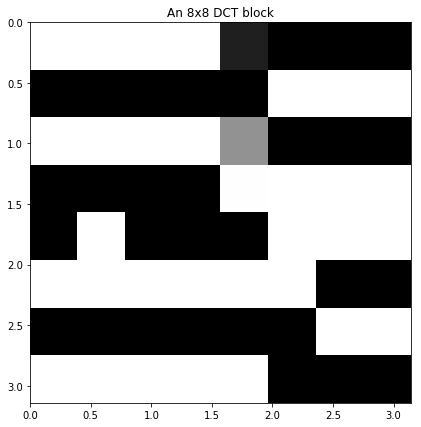

In [40]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(im[pos:pos+8,pos:pos+8],cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()
plt.imshow(dct[pos:pos+8,pos:pos+8],cmap='gray',vmax= np.max(dct)*0.01,vmin = 0, extent=[0,pi,pi,0])
plt.title( "An 8x8 DCT block")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

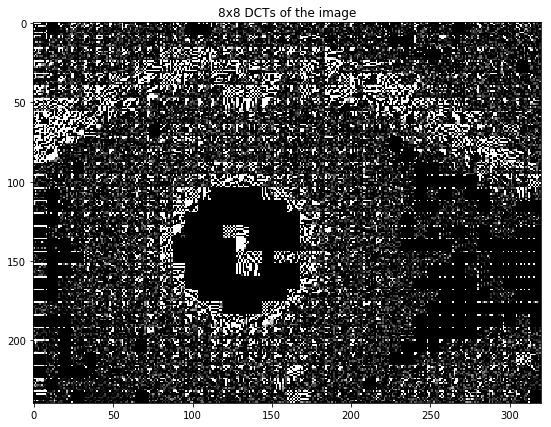

In [41]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 32.757812% of the DCT coefficients


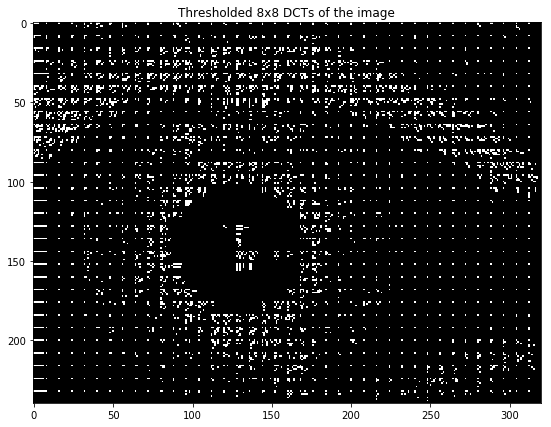

In [42]:
# Threshold
thresh = 0.012
dct_thresh_iris = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh_iris,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh_iris != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

In [43]:
dct_thresh_iris

array([[[1817.75      , 1817.75      , 1817.75      ],
        [  40.52197697,   40.52197697,   40.52197697],
        [  48.13624   ,   48.13624   ,   48.13624   ],
        ...,
        [   0.        ,    0.        ,    0.        ],
        [  -0.        ,   -0.        ,   -0.        ],
        [  -0.        ,   -0.        ,   -0.        ]],

       [[   0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ],
        ...,
        [   0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ]],

       [[ -25.94390041,  -25.94390041,  -25.94390041],
        [   0.        ,    0.        ,    0.        ],
        [  -0.        ,   -0.        ,   -0.        ],
        ...,
        [   0.        ,    0.        ,    0.        ],
        [   0.        ,    0.        ,    0.        ],
        [  -0.        

In [44]:
feature_vector_iris = dct_thresh_iris.ravel()

In [45]:
combine_vector = np.concatenate((feature_vector_fingerprint,feature_vector_iris), axis=0, out=None)

In [46]:
combine_vector

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
combine_vector.shape

(324200,)